# Plotly Test
This notebook is used to test plotly functionality, before being displayed in the streamlit app. It will focus on using [*Plotly Express*](https://plotly.com/python/plotly-express/), which is a more high-level implementation of the *plotly.js* wrapper *'Plotly Graph Objects'*

The 2d-cartesian plotting functions are available as a [Pandas plotting backend](https://plotly.com/python/pandas-backend/).

## 1.- Cluster graph

In [15]:
import pandas as pd

import numpy as np
from tslearn.barycenters import dtw_barycenter_averaging
import matplotlib.pyplot as plt
from tslearn.clustering import TimeSeriesKMeans
import math

from plotly.subplots import make_subplots
import plotly.graph_objects as go

In [16]:
N_CLUSTERS = 5
DEFAULT_PLOTLY_CLUSTER_COLORS=['rgb(31, 119, 180)', 'rgb(255, 127, 14)',
                       'rgb(44, 160, 44)', 'rgb(214, 39, 40)',
                       'rgb(148, 103, 189)', 'rgb(140, 86, 75)',
                       'rgb(227, 119, 194)', 'rgb(127, 127, 127)',
                       'rgb(188, 189, 34)', 'rgb(23, 190, 207)']
DEFAULT_PLOTLY_FILL_CLUSTER_COLORS=['rgba(31, 119, 180, 0.2)', 'rgba(255, 127, 14, 0.2)',
                       'rgba(44, 160, 44, 0.2)', 'rgba(214, 39, 40, 0.2)',
                       'rgba(148, 103, 189, 0.2)', 'rgba(140, 86, 75, 0.2)',
                       'rgba(227, 119, 194, 0.2)', 'rgba(127, 127, 127, 0.2)',
                       'rgba(188, 189, 34, 0.2)', 'rgba(23, 190, 207, 0.2)']

In [17]:
# Weather data
raw_ts_data = pd.read_pickle('../Dataset/preprocessed/weather/X.pkl')

<AxesSubplot: title={'center': 'ABTIRANA'}>

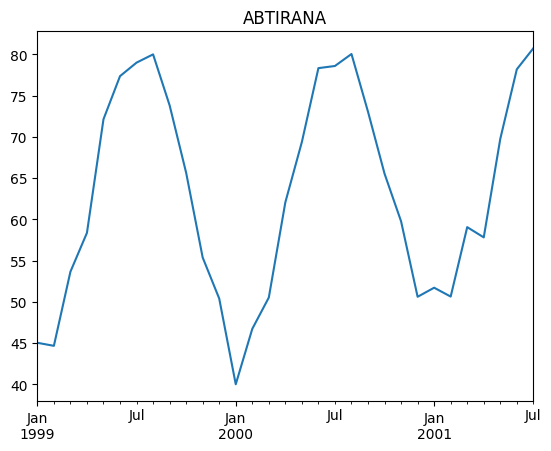

In [18]:
raw_ts_data.iloc[0].plot(title=raw_ts_data.index[0])

In [19]:
# number of clusters k is the square root of the number of points in the training data
cluster_count = math.ceil(math.sqrt(len(raw_ts_data))) 
cluster_count = min(5,cluster_count)
print(f"Nº of clusters: {cluster_count}")
km = TimeSeriesKMeans(n_clusters=cluster_count, metric="dtw")

cluster_labels_weather = km.fit_predict(raw_ts_data)

Nº of clusters: 5


In [20]:
lower_bound = raw_ts_data.min().min()
higher_bound = raw_ts_data.max().max()

In [21]:
#Convert Period objects to timestamps for PyPlot to be able to process them
raw_ts_data.columns = raw_ts_data.columns.to_timestamp()

In [22]:
fig = make_subplots(rows=cluster_count, cols=1, vertical_spacing=0.015)

for cluster in range(cluster_count):
    idxs = np.where(cluster_labels_weather==cluster)[0]
    cluster_data = raw_ts_data.iloc[idxs]
    # print(f"CLuster {cluster+1} - {cluster_data.shape}")
    # Plot each raw TS

    for idx, row in cluster_data.iterrows():
        fig.add_trace(go.Scatter(x=cluster_data.columns, y=row, line_color='rgba(30, 30, 30, 0.1)'),row=cluster+1, col=1)
    # Plot each cluster identifier
    barycenter = dtw_barycenter_averaging(cluster_data, max_iter=5).flatten()
    fig.add_trace(go.Scatter(x=cluster_data.columns, y=barycenter, line=dict(color=DEFAULT_PLOTLY_CLUSTER_COLORS[cluster], width=7)),row=cluster+1, col=1)
    fig.update_yaxes(range=[lower_bound, higher_bound], row=cluster+1, col=1, title=f"Cluster {cluster+1}", title_font_family="Arial", title_font_size=24, title_font_color=DEFAULT_PLOTLY_CLUSTER_COLORS[cluster]) 

fig.update_layout(height=1000, width=500,margin=dict(l=0, r=10, t=10, b=20))
fig.update_traces(showlegend=False)
fig.show()

## Dimensionality reduction

In [23]:
pd.read_pickle('../Dataset/performance_scores/error_weather.pkl')

SimpleNaive  SeasonalNaive  AutoArima  LinearRegression  \
ABTIRANA    22.400416       4.702117   4.182453          4.343980   
AGBUENOS    13.839546       3.050726   2.895221          2.612879   
AKANCHOR    29.247810       7.815481   5.665432          6.460396   
AKFAIRBA    44.875075       7.060070   9.969876          6.128185   
AKJUNEAU    16.420679       2.704492   2.754219          3.723620   
...               ...            ...        ...               ...   
YGPRISTN    27.034218       6.817973   9.479892          6.366931   
YGSKOPJE    30.587814       7.326762   8.788968          7.231045   
YGZAGREB    26.283078       7.248386   7.539376          5.274111   
ZACAPTWN     8.913000       1.676773   0.740630          1.161906   
ZBLUSAKA    11.092391       2.023867   6.184650          2.053860   

          RidgeRegression   LightGBM    XGBoost       LSTM        SVM  \
ABTIRANA         4.343672   5.175044   6.231714  52.603792   9.906997   
AGBUENOS         2.614368   2.601306   3.412819  10.779130   2.601814   
AKANCHOR         6.456109  25.379561  19.967063  34.938688  38.116948   
AKFAIRBA         6.121060  39.275146  33.058997  48.718283  55.370247   
AKJUNEAU         3.719854  13.951383   8.804659  23.322408  24.171263   
...                   ...        ...        ...        ...        ...   
YGPRISTN         6.365111  13.646680  10.900747  25.782930  21.472106   
YGSKOPJE         7.229813  14.172137  11.882807  34.998414  21.376625   
YGZAGREB         5.275989  11.376318   8.968523  28.160655  18.289796   
ZACAPTWN         1.157526   1.196891   2.088725  15.065596   2.510812   
ZBLUSAKA         2.052174   2.147338   2.205829   6.812676   2.737837   

            1-D CNN  
ABTIRANA  10.388602  
AGBUENOS   8.493753  
AKANCHOR  10.505966  
AKFAIRBA  19.948462  
AKJUNEAU   7.026370  
...             ...  
YGPRISTN  11.307034  
YGSKOPJE  12.847552  
YGZAGREB  10.291325  
ZACAPTWN   8.558300  
ZBLUSAKA  11.168219  

[323 rows x 10 columns]

In [24]:
import plotly.express as px
from scipy.spatial import ConvexHull
import numpy as np
from sklearn.preprocessing import StandardScaler
import umap
raw_ts_data = pd.read_pickle('../Dataset/preprocessed/weather/X.pkl')
performance_score_data = pd.read_pickle('../Dataset/performance_scores/error_weather.pkl')
clusters = pd.read_pickle('../Dataset/cluster_data/ts_weather_clusters.pkl').values
performance_score_data = performance_score_data.mean(axis=1).values

# Create embeddings
reducer = umap.UMAP()
scaled_weather_data = StandardScaler().fit_transform(raw_ts_data)
embedding_weather = reducer.fit_transform(scaled_weather_data)

# Create a scatterplot with different colors for each cluster
dimred_fig = px.scatter(x=embedding_weather[:,0], y=embedding_weather[:,1], color=performance_score_data, symbol=clusters, hover_name=[f'Score: {performance_score:.2f}<br>Cluster: {cluster_id+1}' for performance_score, cluster_id in zip(performance_score_data, clusters)])
dimred_fig.update_traces(hovertemplate='')

# Compute the convex hulls of each cluster and add them to the plot
for label in np.unique(clusters):
    points = embedding_weather[clusters == label]
    hull = ConvexHull(points)
    hull_points = np.append(points[hull.vertices], [points[hull.vertices[0]]], axis=0)
    dimred_fig.add_trace(go.Scatter(x=hull_points[:,0], y=hull_points[:,1], 
                    mode='lines', fill='toself', line_color=DEFAULT_PLOTLY_CLUSTER_COLORS[label], fillcolor=DEFAULT_PLOTLY_FILL_CLUSTER_COLORS[label],hoverinfo='skip'))
dimred_fig.update_traces(showlegend=False)
dimred_fig.update_layout(yaxis_visible=True, yaxis_showticklabels=False, yaxis_title='',xaxis_visible=True, xaxis_showticklabels=False, xaxis_title='')
dimred_fig.update_layout(height=1000, width=1000,margin=dict(l=0, r=0, t=10, b=10))
dimred_fig.show()

## Cluster Model Performance-Matrix

In [25]:
unique_clusters = np.unique(clusters)

performance_score_data = pd.read_pickle('../Dataset/performance_scores/error_weather.pkl')


cluster_performance_data = {model: [] for model in performance_score_data.columns}

for cluster in unique_clusters:
    cluster_data = performance_score_data.iloc[np.where(clusters==cluster)]
    for model, metric in cluster_data.mean().items():
        cluster_performance_data[model].append(metric)

cluster_performance_matrix_weather = pd.DataFrame(cluster_performance_data, index = [f"Cluster {cluster_id+1}" for cluster_id in unique_clusters])
cluster_performance_matrix_weather = pd.concat([cluster_performance_matrix_weather.T,cluster_performance_matrix_weather.mean().rename('TOTAL')], axis=1).T
cluster_performance_matrix_weather = cluster_performance_matrix_weather.sort_values(by='TOTAL', axis=1, ascending=True)
cluster_performance_matrix_weather['TOTAL'] = cluster_performance_matrix_weather.mean(axis = 1)

# Make the tooltip text
tooltip_text = []
n_clusters, models = cluster_performance_matrix_weather.shape
for c in range(n_clusters):
    row = []
    for m in range(models):
        cluster_info = f'Cluster {c+1}' if c < n_clusters-1 else 'Cluster Total'
        model_info = f'{cluster_performance_matrix_weather.columns[m]}' if c < models-1 else 'Model Total'
        row.append(cluster_info + "<br>" + model_info + "<br>" + f"Score: {cluster_performance_matrix_weather.iloc[c,m]:.2f}")
    tooltip_text.append(row)

# Create heatmap with the same colorscale as the scatter plot
clusmod_fig = go.Figure(data=[go.Heatmap(z=cluster_performance_matrix_weather, x=cluster_performance_matrix_weather.columns, y=cluster_performance_matrix_weather.index,
                                   colorscale=dimred_fig.data[0].marker.colorscale, texttemplate="%{z:.2f}"
)])
clusmod_fig.update_traces(hovertemplate='%{text}', text=tooltip_text)

clusmod_fig.update_layout( 
                   xaxis=dict(title='Models'), yaxis=dict(title='Clusters'))

clusmod_fig.update_layout(xaxis_side='top', yaxis_autorange='reversed')
clusmod_fig.update_layout(yaxis_title='', xaxis_title='')

clusmod_fig.update_layout(height=100*len(unique_clusters), width=1000,margin=dict(l=0, r=0, t=10, b=10))
clusmod_fig.show()